In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\dataset\\healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [28]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [30]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
bmi_m = df['bmi'].mean()
df['bmi'] = df['bmi'].replace(np.nan, int(bmi_m))

In [32]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.0,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


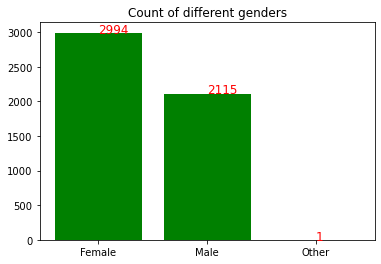

In [36]:
gender = df.groupby('gender')['gender'].count()
plt.bar(gender.index, gender.values, color='green')
plt.title('Count of different genders')
for i, value in enumerate(gender.values):
    plt.text(i, value, str(value),fontsize=12,color='red')
plt.show()

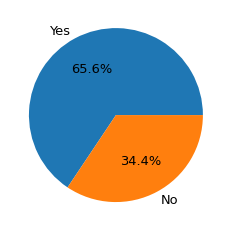

In [38]:
plt.pie(df['ever_married'].value_counts(), labels=['Yes','No'],autopct='%1.1f%%',textprops={'fontsize':13})
plt.show()

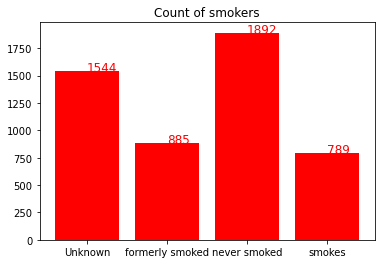

In [39]:
smoke_count = df.groupby('smoking_status')['smoking_status'].count()
plt.bar(smoke_count.index, smoke_count.values, color='red')
plt.title('Count of smokers')
for i, value in enumerate(smoke_count.values):
    plt.text(i, value, str(value),fontsize=12,color='red')
plt.show()

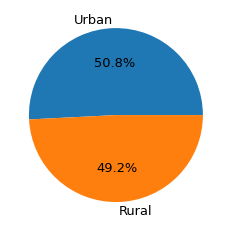

In [40]:
plt.pie(df['Residence_type'].value_counts(), labels=['Urban','Rural'],autopct='%1.1f%%',textprops={'fontsize':13})
plt.show()

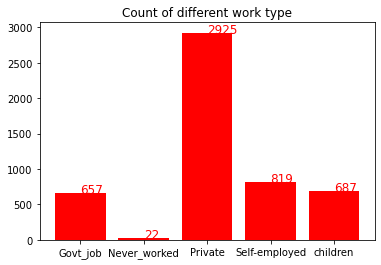

In [42]:
work_type = df.groupby('work_type')['work_type'].count()
plt.bar(work_type.index, work_type.values, color='red')
plt.title('Count of different work type')
for i, value in enumerate(work_type.values):
    plt.text(i, value, str(value),fontsize=12,color='red')
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [44]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.0,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [45]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [46]:
print(x)

[[  1.    67.     0.   ... 228.69  36.6    1.  ]
 [  0.    61.     0.   ... 202.21  28.     2.  ]
 [  1.    80.     0.   ... 105.92  32.5    2.  ]
 ...
 [  0.    35.     0.   ...  82.99  30.6    2.  ]
 [  1.    51.     0.   ... 166.29  25.6    1.  ]
 [  0.    44.     0.   ...  85.28  26.2    0.  ]]


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
clf = RandomForestClassifier(n_estimators = 140)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=140)

In [49]:
y_pred = clf.predict(x_test)

In [50]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9481409001956947
